In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv(r'../data/Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv(r'../data/Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.Age.mean()

29.69911764705882

In [5]:
test.Age.mean()

30.272590361445783

In [6]:
train.Age.median()

28.0

In [7]:
test.Age.median()

27.0

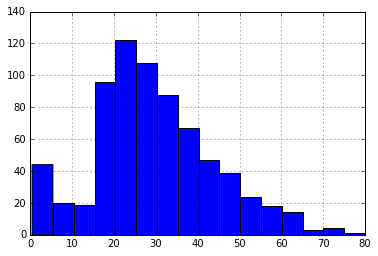

In [8]:
train.Age.hist(bins= 16)

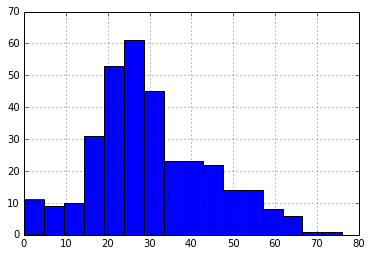

In [9]:
test.Age.hist(bins=16)

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train[train['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [12]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [13]:
train['Gender'] = 4

In [14]:
train.Gender.head()

0    4
1    4
2    4
3    4
4    4
Name: Gender, dtype: int64

In [15]:
train['Gender'] = train['Sex'].map(lambda x: x[0].upper())

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


In [17]:
train['Gender'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [18]:
train[train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [19]:
train['Port'] = train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [20]:
train['Port'][train['Embarked'].isnull() == True] = -99

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
train[train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,-99.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,-99.0


In [22]:
train['Port'] = train['Port'].astype(int)

In [23]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = train[(train['Gender'] == i) & 
                                 (train['Pclass'] == j+1)]['Age'].dropna().median()

In [25]:
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [26]:
train['AgeFill'] = train['Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,35.0


In [27]:
train[train['Age'].isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [28]:
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull()) & 
               (train.Gender == i) & 
               (train.Pclass == j+1), 'AgeFill'] = median_ages[i,j]

In [29]:
train[train['Age'].isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [30]:
train['AgeIsNull'] = pd.isnull(train.Age).astype(int)

In [31]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [32]:
train['Age*Class'] = train.AgeFill * train.Pclass

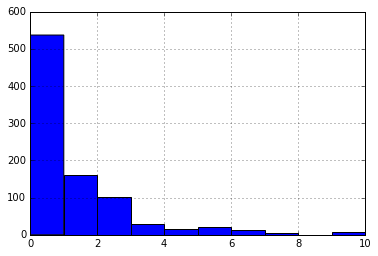

In [33]:
train['FamilySize'].hist()

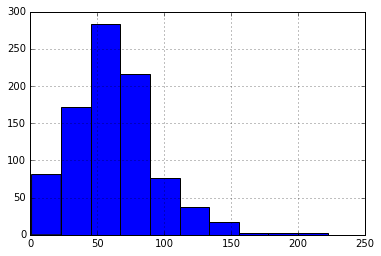

In [34]:
train['Age*Class'].hist()

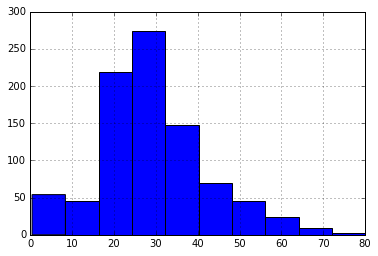

In [35]:
train.AgeFill.hist()

In [36]:
train.dtypes[train.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [37]:
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,3,22.0,0,1,66.0
1,2,1,1,1,0,71.2833,0,1,38.0,0,1,38.0
2,3,1,3,0,0,7.9250,0,3,26.0,0,0,78.0
3,4,1,1,1,0,53.1000,0,3,35.0,0,1,35.0
4,5,0,3,0,0,8.0500,1,3,35.0,0,0,105.0


In [39]:
train_data = train.values
train_data

array([[   1. ,    0. ,    3. , ...,    0. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    0. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [40]:
forest = RandomForestClassifier(n_estimators = 100)

In [41]:
forest = forest.fit(train_data[0::,1::], train_data[0::,0])

In [42]:
os.listdir(r'../data/Titanic/')

['genderclassmodel.csv', 'gendermodel.csv', 'test.csv', 'train.csv']

In [43]:
#output = forest.predict(test_data)